In [2]:
print("""
@Title: Modeling a moving average process
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-11-30 21:46:18
@Description: 
""")


@Title: Modeling a moving average process
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-11-30 21:46:18
@Description: 



## Simulate a MA(2) process and make forecasts

In [5]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(42)

ma2 = np.array([1, .9, .3])
ar2 = np.array([1, 0, 0])

MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1_000)

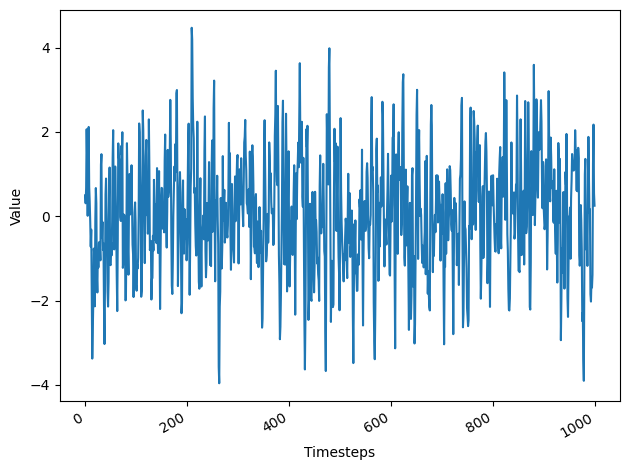

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(MA2_process)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

fig.autofmt_xdate()
plt.tight_layout()

In [10]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(MA2_process)
ADF_result[0], ADF_result[1]

(-14.00544430919449, 3.795601616713556e-26)

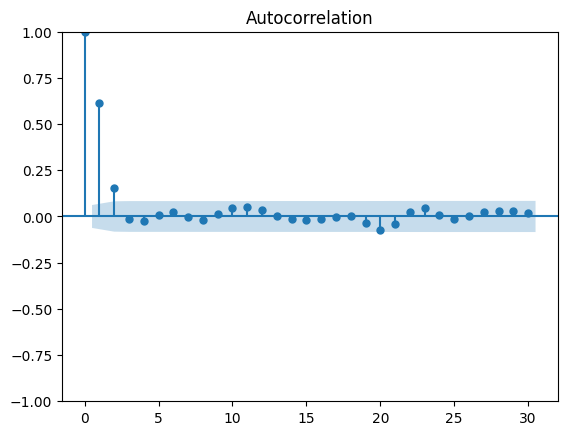

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plot_acf(MA2_process)

In [21]:
import pandas as pd
df = pd.DataFrame({'value': MA2_process})
train = df[:800].copy()
test = df[800:].copy()

In [22]:
from utils.rolling_forecast import rolling_forecast

TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_ma = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'MA')

test.loc[:, 'pred_mean'] = pred_mean
test.loc[:, 'pred_ma'] = pred_ma
test.loc[:, 'pred_last'] = pred_last

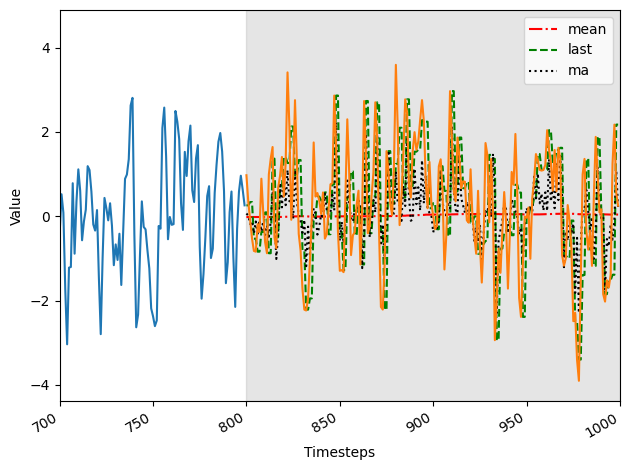

In [30]:
from utils.ts_plot import plot_pred

fig, ax = plot_pred(test, ways=['mean', 'last', 'ma'])
ax.plot(train)
ax.plot(test['value'])
ax.legend()
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.xlim(700, 1000)
fig.autofmt_xdate()
plt.tight_layout()


In [32]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_ma = mean_squared_error(test['value'], test['pred_ma'])

mse_mean, mse_last, mse_ma

(1.8635013982365882, 1.988201688527919, 1.232354219066492)

(0.0, 2.2)

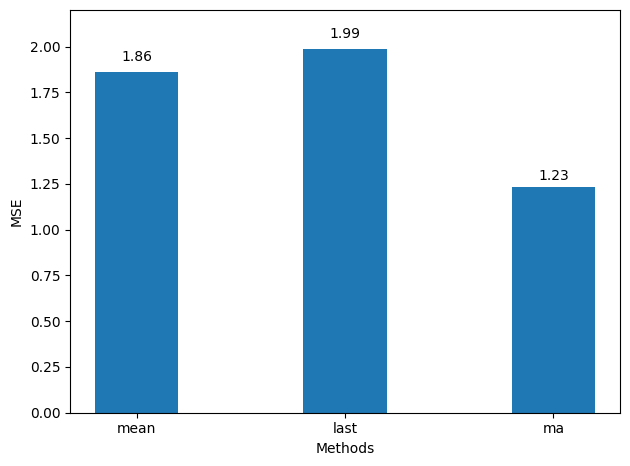

In [34]:
from utils.ts_plot import plot_metrics_compare
fig, ax = plot_metrics_compare(['mean', 'last', 'ma'],
                     [mse_mean, mse_last, mse_ma])
ax.set_ylim(0, 2.2)

## Simulate a MA(q) process and make forecasts

与 MA(2) 基本一致，没什么意思 😀😀